# Signal Decomposition and Fourier Transforms

In [48]:
import time

from matplotlib import pyplot as plt
from IPython.display import clear_output

import numpy as np
from numpy import pi, sin, cos, linspace
from scipy.fftpack import fft, fftfreq

import ipywidgets

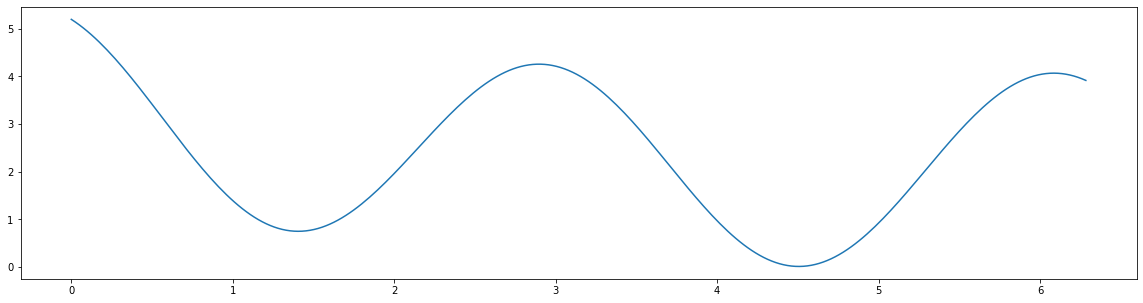

In [49]:
def f(x):
    return 2 * sin(2 * x + 2) + 5 - 3 * cos(0.2 * x - 1)

t = linspace(0, pi * 2, 256)
f_t = f(t)

plt.figure(figsize=(20, 5))
plt.plot(t, f_t)
plt.show()

In [47]:
n_fft = 256
fourier_coefs = fft(f_t, n_fft)
frequencies = fftfreq(n_fft, 2 * pi /  256)
decomposition = 0

data = []
for i, coef in enumerate(fourier_coefs):
    sinewave = (1. / len(t)) * \
        (
            coef.real * cos(frequencies[i] * 2 * pi * t) - \
            coef.imag * sin(frequencies[i] * 2 * pi * t)
        )
    decomposition += sinewave
    data.append(decomposition.copy())

@ipywidgets.widgets.interact(frequencies=(0, len(data) - 1, 1))
def fourier_approximation(frequencies=0):
    plt.figure(figsize=(20, 5))
    plt.plot(t, f_t, label='Original Signal', c='green')
    plt.plot(t, data[frequencies], c='red', label=f'Decomposition. {frequencies} freqs')
    plt.legend()
    plt.grid()
    plt.show()

interactive(children=(IntSlider(value=0, description='frequencies', max=255), Output()), _dom_classes=('widget…